In [1]:
import xml.etree.ElementTree as ET
# Rite of spring piano (complex because only chords, cannot handle chords yet)
#tree = ET.parse('Stravinsky-Rite_of_spring_piano_duo_second_part.xml')

# The Firebird, Stravinsky
#pieceName = "Stravinsky-Firebird_Finale"
#pieceName = "Queen-Bohemian_Rhapsody"
#pieceName = "Queen-Bohemian_Rhapsody_Voice"
#pieceName = "La_La_Land-City_Of_Stars"
#pieceName = "Queen-I_want_to_break_free"
#pieceName = "Lady_Gaga-Bad_Romance"
#pieceName = "Lady_Gaga-Poker_Face"
#pieceName = "Amazing_Grace"
#pieceName = "Super_Mario_Bros.-Main_Theme"
pieceName = "Get_Lucky-Daft_Punk"
tree = ET.parse("MusicXML parts/" + pieceName + '.xml')
root = tree.getroot()

# Print info on different parts
title = pieceName.replace("_", " ")
title = title.replace("-", " - ")
print(title)
partList = root.findall("./part-list/score-part")
nbParts = 0
for part in partList:
    nbParts+=1
    print("  "+part.tag, part.attrib, part.find('./part-name').text)

Get Lucky - Daft Punk
  score-part {'id': 'P1'} Piano


Piano
349.23 493.88 349.23 493.88 349.23 493.88 440.0 493.88 349.23 440.0 587.33 146.83 174.61 246.94  349.23 440.0 587.33 349.23 440.0 587.33 349.23 440.0 587.33 523.25 587.33 349.23 440.0 523.25 146.83 174.61 220.0  349.23 440.0 523.25 349.23 440.0 523.25 349.23 440.0 523.25 493.88 523.25 329.63 392.0 493.88 130.81 174.61 220.0  329.63 392.0 493.88 329.63 392.0 493.88 329.63 392.0 493.88 493.88 440.0 392.0 123.47 164.81 196.0 123.47 164.81 196.0  349.23 493.88 349.23 493.88 349.23 493.88 440.0 493.88 349.23 440.0 587.33 146.83 174.61 246.94 146.83 174.61 246.94 146.83 174.61 246.94 146.83 174.61 246.94  349.23 440.0 587.33 349.23 440.0 587.33 349.23 440.0 587.33 523.25 587.33 349.23 440.0 523.25 146.83 174.61 220.0 146.83 174.61 220.0 146.83 174.61 220.0 146.83 174.61 220.0  349.23 440.0 523.25 349.23 440.0 523.25 349.23 440.0 523.25 493.88 523.25 329.63 392.0 493.88 130.81 174.61 220.0 130.81 174.61 220.0 130.81 174.61 220.0 130.81 174.61 220.0  329.63 392.0 493.88 329.63 392.0 493.

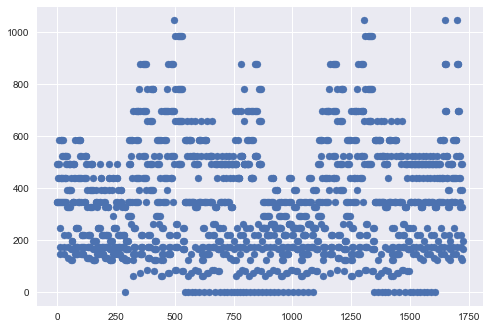

In [2]:
import numpy as np
import utils as u

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

for i in range(1,nbParts+1):
    freqArray = u.getFreqArray(root, pieceName, "P"+str(i), 1)
    x = np.linspace(0, len(freqArray), len(freqArray))
    plt.scatter(x,freqArray)

Part 1... Done!


/Users/nicopatsch/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


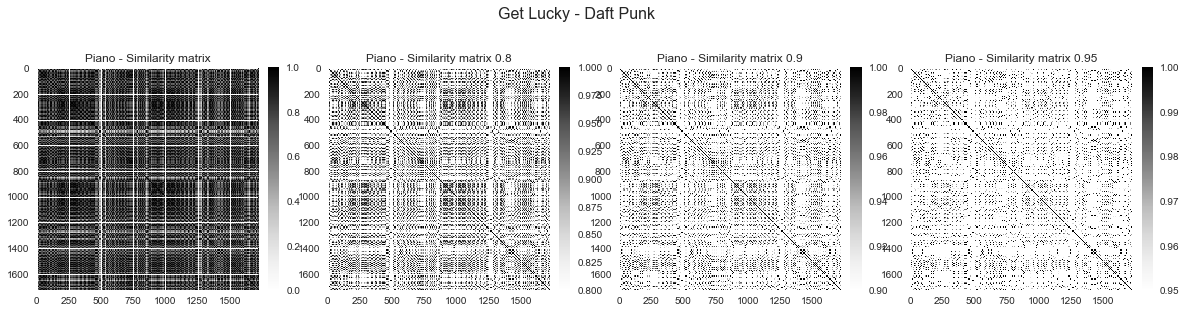

In [3]:
from matplotlib.ticker import NullFormatter
import utils as u

fig = plt.figure(figsize=(20,5*nbParts))
fig.suptitle(title, fontsize=16)

for partID in range(1,nbParts+1):
    print("Part "+str(partID)+"...", end='')
    freqArray = u.getFreqArray(root, pieceName, "P"+str(partID))
    #u.printSimMatrices(freqArray, partList[partID-1].find("./part-name").text, fig, partID, nbParts, 5)
    u.printSimMatrixAndSimple(freqArray, partList[partID-1].find("./part-name").text, fig, partID, nbParts)
    print(" Done!")
fig.show()
#plt.savefig("./PNG/" + pieceName + ".png")

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

X = np.arange(0, nbNotes-1)
Y = np.arange(0, nbNotes-1)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(simMatrix[X][Y])
Z = np.sin(R)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot', linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()




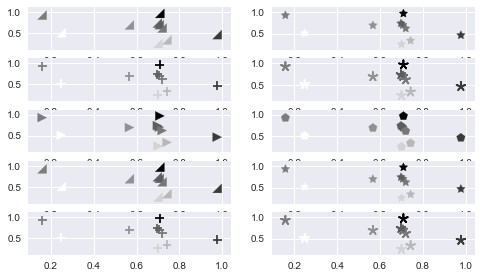

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


x = np.random.rand(10)
y = np.random.rand(10)
z = np.sqrt(x**2 + y**2)

plt.subplot(321)
plt.scatter(x, y, s=80, c=z, marker=">")

plt.subplot(322)
plt.scatter(x, y, s=80, c=z, marker=(5, 0))

verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
plt.subplot(623)
plt.scatter(x, y, s=80, c=z, marker=verts)

plt.subplot(624)
plt.scatter(x, y, s=80, c=z, marker=(5, 1))

plt.subplot(625)
plt.scatter(x, y, s=80, c=z, marker='+')

plt.subplot(626)
plt.scatter(x, y, s=80, c=z, marker=(5, 2))

plt.subplot(627)
plt.scatter(x, y, s=80, c=z, marker=">")

plt.subplot(628)
plt.scatter(x, y, s=80, c=z, marker=(5, 0))

verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
plt.subplot(629)
plt.scatter(x, y, s=80, c=z, marker=verts)

plt.subplot(6, 2, 10)
plt.scatter(x, y, s=80, c=z, marker=(5, 1))

plt.subplot(6, 2, 11)
plt.scatter(x, y, s=80, c=z, marker='+')

plt.subplot(6, 2, 12)
plt.scatter(x, y, s=80, c=z, marker=(5, 2))



plt.show()